In [413]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import center_and_r_vir, remove_bulk_velocity
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from itertools import izip as zip, count # izip for maximum efficiency

In [2]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
path = "bulk1/data_2/hydro_59/output/"
data = pynbody.load(path + "output_00050")
aexp = data.properties['a']
data.physical_units()
r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir
sph_5 = pynbody.filt.Sphere(radius = '5.0 kpc') # %(r_e*1.4))
region = data[sph_5]
rho = region.gas["rho"].in_units("m_p cm**-3")
f = open(data.filename + "/info_"+data.filename[-5:]+".txt","r")
lines = f.readlines()
f.close()
for line in lines:
    if line[0:13]=="unit_l      =":
        print line[:-1]
        unit_l = float(line[14:-1])
    if line[0:13]=="unit_d      =":
        print line[:-1]
        unit_d = float(line[14:-1])
    if line[0:13]=="unit_t      =":
        print line[:-1]
        unit_t = float(line[14:-1])
    if line[0:13]=="omega_b     =":
        print line[:-1]
        omega_b = float(line[14:-1])

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))
omega_b     =  0.450000017881393E-01
unit_l      =  0.682025380323961E+26
unit_d      =  0.123367583719985E-28
unit_t      =  0.163687521954501E+18


In [381]:
def make_pdf(s, s_bar, sigma_s):
    pdf = (1./np.sqrt(2*np.pi*(sigma_s**2))) * (np.exp(-0.5*(((s - s_bar)/sigma_s)**2)))
    return pdf

In [456]:
m_p = pynbody.array.SimArray(1.672621777e-24, "g")
K_b = pynbody.array.SimArray(1.38064852e-16, "cm**2 g s**-2 K**-1")
G = pynbody.array.SimArray(6.67259e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
c_si = pynbody.array.SimArray(2.99792458e5, "km s**-1")
c_cgs = pynbody.array.SimArray(2.99792458e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.13566770e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6737236e-24, 'g')  # hydrogen mass
T_bg = pynbody.array.SimArray(2.73, "K")
eV = pynbody.array.SimArray(6.241509e18, "J")
L_sun = pynbody.array.SimArray(2.43418864387146974e+45, "eV s**-1")
cell_width = pynbody.array.SimArray(region.gas["smooth"]*3.086e+21, "cm")
n_H_mean = pynbody.array.SimArray(100, "cm**-3")
mach_no = pynbody.array.SimArray(5, "1")

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log10


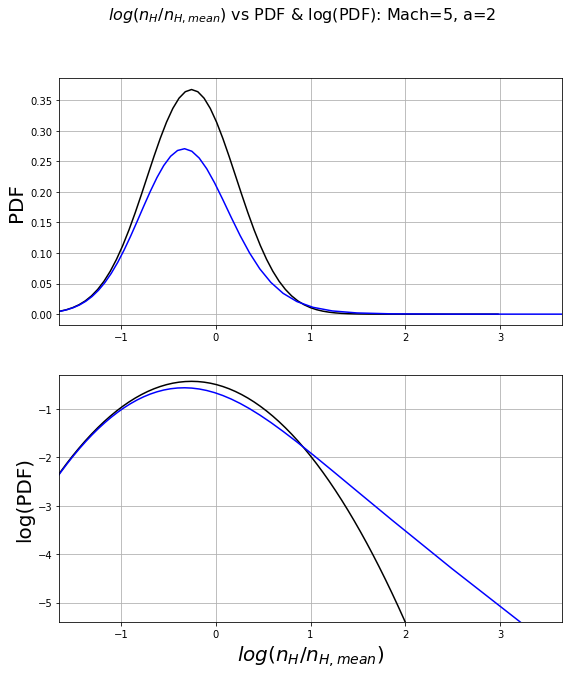

In [498]:
s = np.zeros(100)
pdf = np.zeros(100)
n_H = np.zeros(100)
n_H_prime_1 = np.zeros(100)
n_H_prime = np.zeros(100)
s_prime = np.zeros(100)
pdf_prime = np.zeros(100)
tau = np.zeros(100)
yoo = np.zeros(100)
foo = np.zeros(100)

a = 2
sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
        s[i] = smin + i*ds

n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)

tau = 0.4*np.sqrt(n_H/n_H_mean)
foo = (1/(1-(tau**2)))
yoo = np.power(foo, a)
alpha = yoo
q = ((1-(tau**2))**(a+1))/(1 + ((tau**2)*(a-1)))
n_H_prime_1 = (n_H * alpha)
n_H_prime = n_H_prime_1
index = [i for i, j in zip(count(), n_H_prime_1) if j == np.max(n_H_prime_1)]
index = np.array(index)
for k in range(index+1, len(n_H_prime_1)):
    n_H_prime[k] = 0
pdf_prime = pdf * np.fabs(q)
fig = plt.figure(figsize=(9,10))
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
# plt.rc('legend', fontsize=0)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

ax1.plot(np.log10(n_H/n_H_mean), pdf, color="k")
ax1.plot(np.log10(n_H_prime/n_H_mean), np.abs(pdf_prime), color = "b")
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color="k")
ax2.plot(np.log10(n_H_prime/n_H_mean), np.log10(np.abs(pdf_prime)), color = "b")

ax1.set_xlim([-1.65,3.65])
ax2.set_xlim([-1.65,3.65])
ax2.set_ylim([-5.4,-0.3])
plt.xlabel('$log(n_{H}/n_{H, mean})$')
ax1.set_ylabel('PDF')
ax2.set_ylabel('log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
plt.suptitle('$log(n_{H}/n_{H, mean})$ vs PDF & log(PDF): Mach=5, a=2')
# plt.savefig('outputs/test_plots/log(n_H)vsPDFvslog(PDF)-PDF Evolution-M5-sliced.png', 
#             dpi=300, bbox_inches='tight')
plt.show()

In [499]:
n_H_prime

SimArray([2.77733060e-02, 3.23327989e-02, 3.76409056e-02, 4.38205715e-02,
          5.10149447e-02, 5.93907000e-02, 6.91419109e-02, 8.04945610e-02,
          9.37118009e-02, 1.09100074e-01, 1.27016259e-01, 1.47875993e-01,
          1.72163383e-01, 2.00442329e-01, 2.33369739e-01, 2.71710954e-01,
          3.16357761e-01, 3.68349443e-01, 4.28897376e-01, 4.99413822e-01,
          5.81545623e-01, 6.77213694e-01, 7.88659350e-01, 9.18498709e-01,
          1.06978669e+00, 1.24609239e+00, 1.45158804e+00, 1.69115421e+00,
          1.97050456e+00, 2.29633405e+00, 2.67649574e+00, 3.12021231e+00,
          3.63833020e+00, 4.24362616e+00, 4.95117916e+00, 5.77882370e+00,
          6.74770607e+00, 7.88297139e+00, 9.21461838e+00, 1.07785717e+01,
          1.26180390e+01, 1.47852439e+01, 1.73436641e+01, 2.03709503e+01,
          2.39627826e+01, 2.82380279e+01, 3.33457348e+01, 3.94747622e+01,
          4.68672502e+01, 5.58378028e+01, 6.68013398e+01, 8.03144146e+01,
          9.71380009e+01, 1.18335517e+

In [500]:
pdf_prime

SimArray([8.41249306e-12, 2.21954807e-11, 5.74235633e-11, 1.45680401e-10,
          3.62407459e-10, 8.84051720e-10, 2.11466816e-09, 4.96009690e-09,
          1.14082951e-08, 2.57296056e-08, 5.69018419e-08, 1.23395459e-07,
          2.62391854e-07, 5.47114561e-07, 1.11861628e-06, 2.24262582e-06,
          4.40862191e-06, 8.49799318e-06, 1.60617938e-05, 2.97667875e-05,
          5.40910751e-05, 9.63761801e-05, 1.68367441e-04, 2.88392304e-04,
          4.84326291e-04, 7.97464839e-04, 1.28733881e-03, 2.03736497e-03,
          3.16099731e-03, 4.80773882e-03, 7.16800392e-03, 1.04754324e-02,
          1.50049224e-02, 2.10644745e-02, 2.89790481e-02, 3.90651350e-02,
          5.15957453e-02, 6.67569726e-02, 8.45991714e-02, 1.04987791e-01,
          1.27560729e-01, 1.51700254e-01, 1.76527620e-01, 2.00927201e-01,
          2.23604012e-01, 2.43174207e-01, 2.58282840e-01, 2.67737809e-01,
          2.70644405e-01, 2.66522211e-01, 2.55386218e-01, 2.37777163e-01,
          2.14732259e-01, 1.87695779e-

In [497]:
pdf

SimArray([8.41398839e-12, 2.22000736e-11, 5.74373969e-11, 1.45721258e-10,
          3.62525786e-10, 8.84387757e-10, 2.11560395e-09, 4.96265225e-09,
          1.14151375e-08, 2.57475719e-08, 5.69481000e-08, 1.23512248e-07,
          2.62680989e-07, 5.47816472e-07, 1.12028716e-06, 2.24652605e-06,
          4.41754913e-06, 8.51802961e-06, 1.61058901e-05, 2.98619486e-05,
          5.42924431e-05, 9.67940037e-05, 1.69217530e-04, 2.90088209e-04,
          4.87643715e-04, 8.03827784e-04, 1.29930534e-03, 2.05943108e-03,
          3.20089279e-03, 4.87846084e-03, 7.29092022e-03, 1.06848812e-02,
          1.53548252e-02, 2.16375400e-02, 2.98991415e-02, 4.05132778e-02,
          5.38299373e-02, 7.01355479e-02, 8.96066708e-02, 1.12261365e-01,
          1.37913926e-01, 1.66139828e-01, 1.96257931e-01, 2.27336152e-01,
          2.58224605e-01, 2.87617010e-01, 3.14137180e-01, 3.36443345e-01,
          3.53339647e-01, 3.63882047e-01, 3.67465622e-01, 3.63882047e-01,
          3.53339647e-01, 3.36443345e-

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in log10


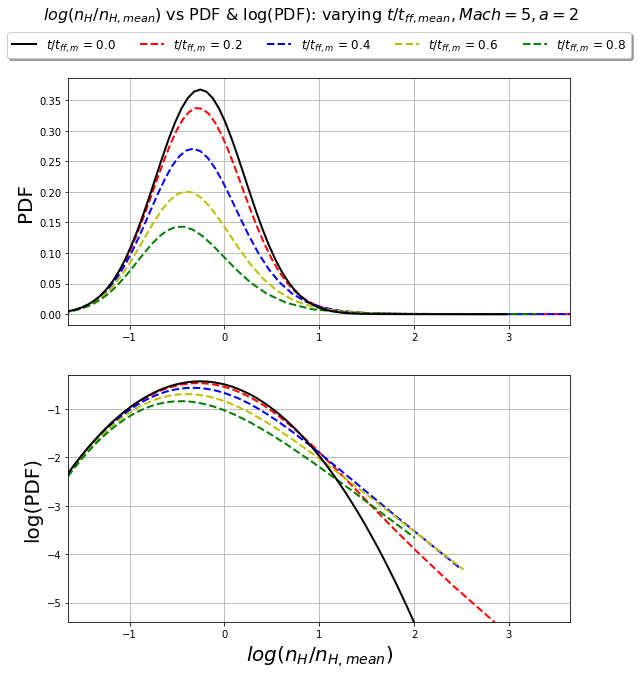

In [487]:
s = np.zeros(100)
pdf = np.zeros(100)
n_H = np.zeros(100)
n_H_prime_1 = np.zeros(100)
n_H_prime = np.zeros(100)
s_prime = np.zeros(100)
pdf_prime = np.zeros(100)
tau = np.zeros(100)
yoo = np.zeros(100)
foo = np.zeros(100)
a = 2
sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
        s[i] = smin + i*ds

n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)

fig = plt.figure(figsize=(9,10))
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
label = "$t/t_{ff,m}$ "
color_arr = ['r','b','y','g']
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='r', lw=2, ls='--'),
                Line2D([0], [0], color='b', lw=2, ls='--'),
                Line2D([0], [0], color='y', lw=2, ls='--'),
                Line2D([0], [0], color='g', lw=2, ls='--')]
ratio = [0.2, 0.4, 0.6, 0.8]
for i in range(0, len(ratio)):    
    color = str(color_arr[i])
    tau = ratio[i]*np.sqrt(n_H/n_H_mean)
    tau = np.nan_to_num(tau, copy=False)
    alpha = ((1-(tau**2))**-a)
    q = ((1-(tau**2))**(a+1))/(1 + ((tau**2)*(a-1)))
    n_H_prime_1 = (n_H * alpha)
    n_H_prime = n_H_prime_1
    index = [i for i, j in zip(count(), n_H_prime_1) if j == np.max(n_H_prime_1)]
    index = np.array(index)
    for k in range(index+1, len(n_H_prime_1)):
        n_H_prime[k] = 0
            
    pdf_prime = pdf * q
    
    ax1.plot(np.log10(n_H_prime/n_H_mean), pdf_prime, color=color, ls='--', lw=2)
    ax2.plot(np.log10(n_H_prime/n_H_mean), np.log10(pdf_prime), color=color, ls='--', lw=2)
ax1.plot(np.log10(n_H/n_H_mean), pdf, color='k', ls='-', lw=2)
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color='k', ls='-', lw=2)
ax1.set_xlim([-1.65,3.65])
ax2.set_xlim([-1.65,3.65])
ax2.set_ylim([-5.4,-0.3])
plt.xlabel('$log(n_{H}/n_{H, mean})$')
ax1.set_ylabel('PDF')
ax2.set_ylabel('log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
fig.suptitle('$log(n_{H}/n_{H, mean})$ vs PDF & log(PDF): varying $t/t_{ff,mean}, Mach=5, a=2$')
legend = ax1.legend(  custom_lines,
            [   label + '= 0.0',
                label + '= 0.2',
                label + '= 0.4',
                label + '= 0.6',
                label + '= 0.8' ],
            loc = 'upper center',
            bbox_to_anchor = (0.5, 1.21),
            ncol = 5,
            fancybox = True,
            shadow = True
                )

# plt.savefig('outputs/test_plots/log(n_H)vsPDFvslog(PDF)-PDF Evolution-varying ratio-M5-sliced.png', 
#             dpi=300, bbox_inches='tight')
plt.show()

In [488]:
n_H_prime

SimArray([2.77807122e-02, 3.23428367e-02, 3.76545102e-02, 4.38390103e-02,
          5.10399360e-02, 5.94245729e-02, 6.91878224e-02, 8.05567911e-02,
          9.37961514e-02, 1.09214411e-01, 1.27171247e-01, 1.48086093e-01,
          1.72448204e-01, 2.00828463e-01, 2.33893253e-01, 2.72420771e-01,
          3.17320256e-01, 3.69654675e-01, 4.30667575e-01, 5.01814911e-01,
          5.84802902e-01, 6.81633185e-01, 7.94656868e-01, 9.26639503e-01,
          1.08083952e+00, 1.26110343e+00, 1.47198191e+00, 1.71887249e+00,
          2.00819573e+00, 2.34761486e+00, 2.74631139e+00, 3.21533436e+00,
          3.76804705e+00, 4.42070421e+00, 5.19320647e+00, 6.11009810e+00,
          7.20190372e+00, 8.50694438e+00, 1.00738422e+01, 1.19650316e+01,
          1.42617706e+01, 1.70714351e+01, 2.05383691e+01, 2.48604252e+01,
          3.03148773e+01, 3.73003097e+01, 4.64068138e+01, 5.85386617e+01,
          7.51395812e+01, 9.86318260e+01, 1.33336740e+02, 1.87590378e+02,
          2.79222242e+02, 4.52252315e+

In [489]:
pdf_prime

SimArray([ 8.40800846e-12,  2.21817067e-11,  5.73820798e-11,
           1.45557890e-10,  3.62052681e-10,  8.83044281e-10,
           2.11186298e-09,  4.95243775e-09,  1.13877893e-08,
           2.56757727e-08,  5.67632648e-08,  1.23045671e-07,
           2.61526118e-07,  5.45013544e-07,  1.11361670e-06,
           2.23096062e-06,  4.38193486e-06,  8.43813100e-06,
           1.59301378e-05,  2.94828936e-05,  5.34908842e-05,
           9.51321553e-05,  1.65839531e-04,  2.83356470e-04,
           4.74492058e-04,  7.78639282e-04,  1.25201489e-03,
           1.97240060e-03,  3.04390356e-03,  4.60091247e-03,
           6.81003369e-03,  9.86840986e-03,  1.39965540e-02,
           1.94238099e-02,  2.63649310e-02,  3.49872011e-02,
           4.53690830e-02,  5.74535503e-02,  7.10018204e-02,
           8.55557635e-02,  1.00419183e-01,  1.14668686e-01,
           1.27203250e-01,  1.36837226e-01,  1.42434398e-01,
           1.43071320e-01,  1.38208028e-01,  1.27835606e-01,
           1.12565721e-0

In [412]:
index

array([57])

In [403]:
n_H_prime_1[57]

194655.60969516396

In [404]:
np.max(n_H_prime_1)

SimArray(194655.60969516, 'cm**-3')

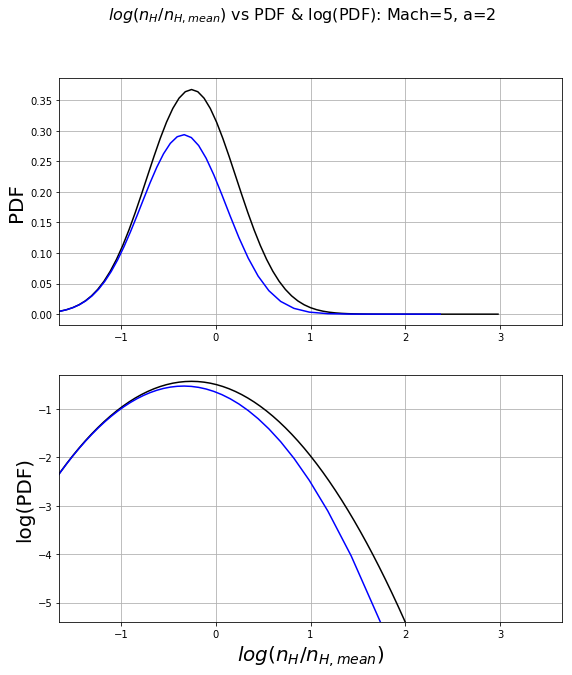

In [569]:
s = np.zeros(100)
s_1 = np.zeros(100)
pdf = np.zeros(100)
pdf_1 = np.zeros(100)
n_H = np.zeros(100)
n_H_1 = np.zeros(100)
n_H_prime = np.zeros(100)
pdf_prime = np.zeros(100)
tau = np.zeros(100)
yoo = np.zeros(100)
foo = np.zeros(100)

a = 1.8614
sigma_s = np.sqrt(np.log(1 + ((0.3 * mach_no)**2)))
s_bar = -0.5*(sigma_s**2)
smin = -7*sigma_s + s_bar
smax = 7*sigma_s + s_bar
ds = (smax - smin)/100
for i in range(0, 100):
        s[i] = smin + i*ds

n_H = n_H_mean * np.exp(s)
pdf = make_pdf(s, s_bar, sigma_s)

tau = 0.4*np.sqrt(n_H/n_H_mean)
# foo 
alpha = (1/(1-(tau**2)))**a
# yoo = np.power(foo, a)
# alpha = yoo
alpha_1 = (1/(1-(tau**2)))**(a+1)
q = alpha + (a*(tau**2)/alpha_1)
# q = ((1-(tau**2))**(a+1))/(1 + ((tau**2)*(a-1)))
n_H_1 = n_H * alpha

# index = [ch for ch, fs in zip(count(), n_H_1) if fs == np.max(n_H_1)]
# index = np.concatenate(([index, index]))
# for k in range(index+1, len(n_H_1)):
#     n_H_prime[k] = 0

s_1 = np.log(n_H_1/n_H_mean)
pdf_1 = make_pdf(s_1, s_bar, sigma_s)
pdf_prime = pdf_1/q

fig = plt.figure(figsize=(9,10))
gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :])
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
# plt.rc('legend', fontsize=0)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

ax1.plot(np.log10(n_H/n_H_mean), pdf, color="k")
ax1.plot(np.log10(n_H_1/n_H_mean), pdf_prime, color = "b")
ax2.plot(np.log10(n_H/n_H_mean), np.log10(pdf), color="k")
ax2.plot(np.log10(n_H_1/n_H_mean), np.log10(pdf_prime), color = "b")

ax1.set_xlim([-1.65,3.65])
ax2.set_xlim([-1.65,3.65])
ax2.set_ylim([-5.4,-0.3])
plt.xlabel('$log(n_{H}/n_{H, mean})$')
ax1.set_ylabel('PDF')
ax2.set_ylabel('log(PDF)')
ax1.grid(b=True, which='both', axis='both')
ax2.grid(b=True, which='both', axis='both')
plt.suptitle('$log(n_{H}/n_{H, mean})$ vs PDF & log(PDF): Mach=5, a=2')
# plt.savefig('outputs/test_plots/log(n_H)vsPDFvslog(PDF)-PDF Evolution-M5-sliced.png', 
#             dpi=300, bbox_inches='tight')
plt.show()

In [570]:
pdf_prime

SimArray([8.41708437e-12, 2.22093078e-11, 5.74643807e-11, 1.45798506e-10,
          3.62742417e-10, 8.84982845e-10, 2.11720510e-09, 4.96687159e-09,
          1.14260261e-08, 2.57750874e-08, 5.70161783e-08, 1.23677145e-07,
          2.63071946e-07, 5.48723638e-07, 1.12234688e-06, 2.25110113e-06,
          4.42748844e-06, 8.53914301e-06, 1.61497290e-05, 2.99508878e-05,
          5.44686626e-05, 9.71348018e-05, 1.69860399e-04, 2.91270045e-04,
          4.89758807e-04, 8.07507645e-04, 1.30551776e-03, 2.06958248e-03,
          3.21689173e-03, 4.90265391e-03, 7.32573648e-03, 1.07319084e-02,
          1.54128853e-02, 2.16991330e-02, 2.99444044e-02, 4.05003885e-02,
          5.36807558e-02, 6.97153090e-02, 8.86968546e-02, 1.10525586e-01,
          1.34857910e-01, 1.61068309e-01, 1.88233525e-01, 2.15147638e-01,
          2.40374210e-01, 2.62337488e-01, 2.79449115e-01, 2.90260482e-01,
          2.93624904e-01, 2.88849286e-01, 2.75813246e-01, 2.55035383e-01,
          2.27671899e-01, 1.95441304e-